In [1]:
#Importing the libraries

import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy as scipy

In [2]:
# Importing the dataset
dataset = pd.read_csv('C:/Users/miant/Desktop/Python/LungCapData.csv')
dataset.head()

,LungCap,Age,Height,Smoke,Gender
0,6.475,6,62.1,no,male
1,10.125,18,74.7,yes,female
2,9.550,16,69.7,no,female
3,11.125,14,71.0,no,male
4,4.800,5,56.9,no,male


<Figure size 432x288 with 0 Axes>

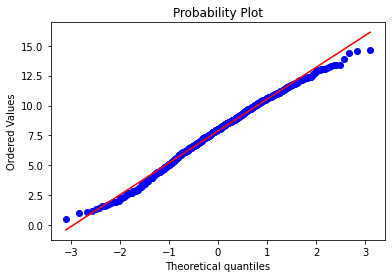

<Figure size 432x288 with 0 Axes>

In [3]:
#Step 1: Checking normality of the data to decide what test to use
#QQ-plot

stats.probplot(dataset.LungCap, plot = plt)
plt.figure()

In [4]:
#We perform and verify Shapiro Test to check normality for males

#H0: data comes from normal distribution
#H1: data does not come from normal distribution

stats.shapiro(dataset.LungCap[dataset.Gender=="male"])

ShapiroResult(statistic=0.9927485585212708, pvalue=0.07271353155374527)

As p-value is greater than alpha, we accept the null hypothesis, and thus, the data comes from normal distribution

In [5]:
#We perform and verify Shapiro Test to check normality for females

#H0: data comes from normal distribution
#H1: data does not come from normal distribution

stats.shapiro(dataset.LungCap[dataset.Gender=="female"])

ShapiroResult(statistic=0.9866778254508972, pvalue=0.0022451209370046854)

As p-value is less than alpha, we cannot assume normality of the data in this case. Then, we need to look for a non-parametric test

We will use U-Mann Whitmann to compare these two variables (males and females)

In [6]:
#Step 1: We state the hypothesis

#H0: there is no difference in the Lung capacity between males and females
#H1: there is a difference in the lung capacity between males and females

#Step: We create the variables

M = dataset.LungCap[dataset.Gender=="male"]
F = dataset.LungCap[dataset.Gender=="female"]

In [7]:
from scipy.stats import mannwhitneyu

In [8]:
stat, p = mannwhitneyu(M, F)

print('Statistical Test:', stat)
print("p-value:", p)

Statistical Test: 53624.0
p-value: 9.3192678331822e-06


Result: p-value < 0.05 --> I reject H0

Interpretation: At a 5% significance level, there is no evidence to say that the lung capacity is the same for males and females

Let's say that we want to get the real average in terms of lung capacity for males at a 90% confidence level

In [10]:
#Step 1: I define my variable

M


0       6.475
3      11.125
4       4.800
6       4.950
7       7.325
        ...  
716     7.075
718     7.175
719     7.325
721     9.050
724     7.100
Name: LungCap, Length: 367, dtype: float64

In [11]:
#We create the confidence interval

import scipy.stats as st #library for CI Student's T

In [14]:
st.t.interval(alpha = 0.90, df = len(M) - 1, loc = np.mean(M),scale = st.sem(M))

(8.078363200359638, 8.540301649776595)

At a 90% confidence we can say that the average of the lung capacity of the males is between 8.07 and 8.54 (unit of measurement)